This script contains the following:
1. Importing libraries and data
2. Data cleaning
  2.1 final_df
  2.2 short_term
3. Regression analysis : minimum_nights vs price
   3.1. Data prep for regression analysis
   3.2. Performing regression analysis
   3.3. Regression Analysis: Subset = short term
4. Regression analysis: number of reviews vs availability in Short Term
   4.1. Data prep for regression analysis
   4.2. Performing regression analysis
5. Regression analysis: accommodates vs price in Short Term
   5.1. Data prep for regression analysis
   5.2. Performing regression analysis
6. Performance improvement after removing outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Create path
path = r'/Users/Dulce/Dec2024 - Airbnb Berlin'

In [4]:
# Import 'final_df'
final_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_df_2.pkl'))
final_df.reset_index(drop=True, inplace=True)
final_df.index = range(1, len(final_df) + 1)
final_df.head()

,id,date,month,available,season,name,host_id,host_name,neighbourhood_group,neighbourhood,...,review_scores_location,review_scores_value,instant_bookable,Population,Deficit housing,rental_simple_type,price_range,accommodates_type,rental_type,review_level
1,22438,2024-01-01,January,f,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
2,22438,2024-02-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
3,22438,2024-03-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
4,22438,2024-04-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
5,22438,2024-05-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed


In [5]:
# Import 'short_term'
short_term = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'short_term_3.pkl'))
short_term.reset_index(drop=True, inplace=True)
short_term.index = range(1, len(short_term) + 1)
short_term.shape

(41018, 42)

# 2. Data cleaning

## 2.1 final_df

In [6]:
# Check for missing values

final_df.isnull().sum()

# No missing values to handle

id                                0
date                              0
month                             0
available                         0
season                            0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
availability_365                  0
license                           0
host_response_time                0
host_response_rate                0
host_is_superhost                 0
property_type                     0
accommodates                      0
maximum_nights                    0
first_review                      0
review_scores_rating        

In [7]:
dups = final_df.duplicated()
dups.shape
# No dups

(60730,)

## 2.2 short_term

In [8]:
# Check for missing values

short_term.isnull().sum()

# No missing values to handle

id                                0
date                              0
month                             0
available                         0
season                            0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
availability_365                  0
license                           0
host_response_time                0
host_response_rate                0
host_is_superhost                 0
property_type                     0
accommodates                      0
maximum_nights                    0
first_review                      0
review_scores_rating        

In [9]:
dups = short_term.duplicated()
dups.shape
# No dups

(41018,)

# 3. Regression analysis : minimum_nights vs price

#### HYPOTHESIS: 5. If the number of minimum nights is higher, the price will be lower

## 3.1. Data prep for regression analysis

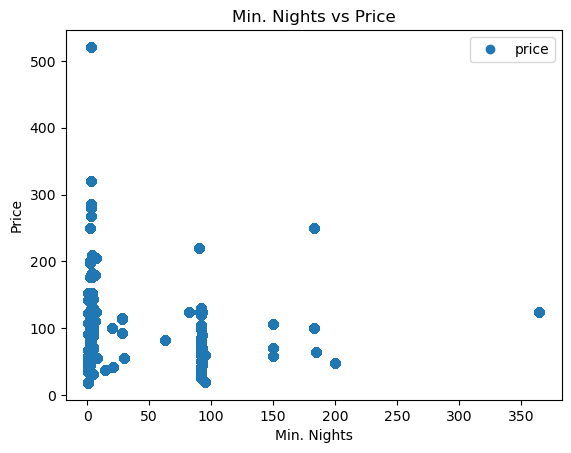

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
plt_minnights_price = final_df.plot(x = 'minimum_nights', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Min. Nights vs Price')  
plt.xlabel('Min. Nights')  
plt.ylabel('Price')  
plt.show()

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = final_df['minimum_nights'].values.reshape(-1,1)
y = final_df['price'].values.reshape(-1,1)

In [12]:
X

array([[93],
       [93],
       [93],
       ...,
       [ 1],
       [ 1],
       [ 1]])

In [13]:
y

array([[53.],
       [53.],
       [53.],
       ...,
       [50.],
       [50.],
       [50.]])

In [14]:
# Split data into a training set and a test set.
X_train_minnights_price, X_test_minnights_price, y_train_minnights_price, y_test_minnights_price = train_test_split(X, y, test_size=0.3, random_state=0)

## 3.2. Performing regression analysis: minimum_nights vs price

In [15]:
# Create a regression object.
regression_minnights_price_train = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [16]:
# Fit the regression object onto the training set.
regression_minnights_price_train.fit(X_train_minnights_price, y_train_minnights_price)

LinearRegression()

In [17]:
# Predict the values of y using X.
y_predicted_minnights_price = regression_minnights_price_train.predict(X_test_minnights_price)

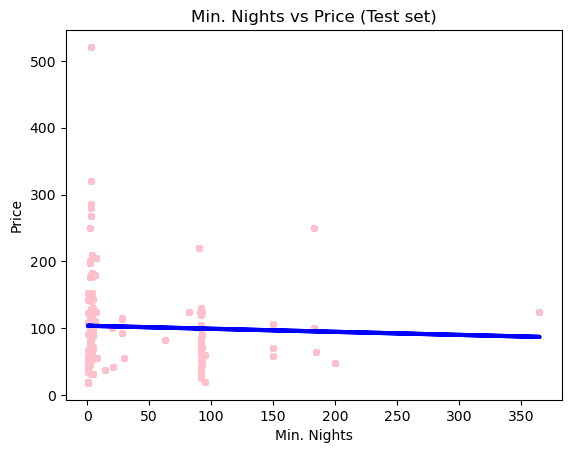

In [18]:
# Create a plot that shows the regression line from the model on the test set.
plot_test_minnights_price = plt
plot_test_minnights_price.scatter(X_test_minnights_price, y_test_minnights_price, color='pink', s = 15)
plot_test_minnights_price.plot(X_test_minnights_price, y_predicted_minnights_price, color='blue', linewidth =3)
plot_test_minnights_price.title('Min. Nights vs Price (Test set)')
plot_test_minnights_price.xlabel('Min. Nights')
plot_test_minnights_price.ylabel('Price')
plot_test_minnights_price.show()

In [19]:
# Create objects that contain the model summary statistics.
rmse_minnights_price_train = mean_squared_error(y_test_minnights_price, y_predicted_minnights_price) # This is the mean squared error
r2_minnights_price_train = r2_score(y_test_minnights_price, y_predicted_minnights_price) # This is the R2 score. 

In [20]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_minnights_price_train.coef_)
print('Mean squared error: ', rmse_minnights_price_train)
print('R2 score: ', r2_minnights_price_train)

Slope: [[-0.04572336]]
Mean squared error:  3783.9715038686395
R2 score:  0.002812625349691622


- SLOPE: A negative slope value indicates a negative relationship (as Min. Nights rises, y Price drops)
- MSE: A higher MSE indicates lower model performance, so 3778 is relatively high. It suggests that, on average, the squared difference between the predicted and actual values is significant.
- R2: In this case, the R2 score is quite low (0.0017), indicating that the model explains very little of the variability in the data, which indicates poor fit.

In [21]:
# Create a dataframe comparing the actual and predicted values of y.
data_minnights_price = pd.DataFrame({'Actual': y_test_minnights_price.flatten(), 'Predicted': y_predicted_minnights_price.flatten()})
data_minnights_price.head(30)

,Actual,Predicted
0,82.000000,103.492460
1,108.000000,103.492460
2,45.000000,103.538184
3,100.000000,95.262255
4,143.000000,103.538184
5,120.000000,103.492460
6,70.000000,96.771126
7,124.515203,99.423081
8,124.515203,103.401013
9,65.000000,99.423081


Predicted values are very far away from actual values in many cases. This model is not good at predicting the variability of the price regarding minimum number of nights.

### Compare how the regression fits the training set

In [22]:
# Predict.
y_predicted_train_minnights_price = regression_minnights_price_train.predict(X_train_minnights_price) # This is predicting X_train!

In [23]:
rmse_minnights_price_test = mean_squared_error(y_train_minnights_price, y_predicted_train_minnights_price)
r2_minnights_price_test = r2_score(y_train_minnights_price, y_predicted_train_minnights_price)

In [24]:
print('Slope:' ,regression_minnights_price_train.coef_)
print('Mean squared error: ', rmse_minnights_price_test)
print('R2 score: ', r2_minnights_price_test)

Slope: [[-0.04572336]]
Mean squared error:  3929.974366632521
R2 score:  0.0025363988063440424


The values continue indicating that is not a good prediction model. Let´s try with a subset for just short-term listing.

## 3.3 Regression Analysis: Subset = short term

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = short_term['minimum_nights'].values.reshape(-1,1)
y = short_term['price'].values.reshape(-1,1)

In [26]:
# Split data into a training set and a test set.
X_train_minnights_price_ST, X_test_minnights_price_ST, y_train_minnights_price_ST, y_test_minnights_price_ST = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
# Create a regression object.
regression_minnights_price_train_ST = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.
regression_minnights_price_train_ST.fit(X_train_minnights_price_ST, y_train_minnights_price_ST)

LinearRegression()

In [29]:
# Predict the values of y using X.
y_predicted_minnights_price_ST = regression_minnights_price_train_ST.predict(X_test_minnights_price_ST)

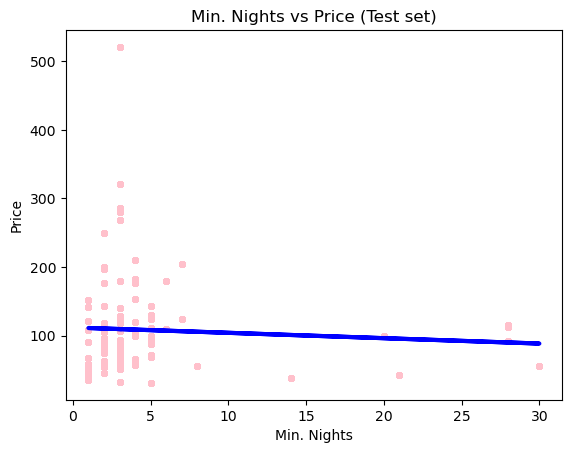

In [30]:
# Create a plot that shows the regression line from the model on the test set.
plot_test_minnights_price_ST = plt
plot_test_minnights_price_ST.scatter(X_test_minnights_price_ST, y_test_minnights_price_ST, color='pink', s = 15)
plot_test_minnights_price_ST.plot(X_test_minnights_price_ST, y_predicted_minnights_price_ST, color='blue', linewidth =3)
plot_test_minnights_price_ST.title('Min. Nights vs Price (Test set)')
plot_test_minnights_price_ST.xlabel('Min. Nights')
plot_test_minnights_price_ST.ylabel('Price')
plot_test_minnights_price_ST.show()

In [31]:
# Create objects that contain the model summary statistics.
rmse_minnights_price_train_ST = mean_squared_error(y_test_minnights_price_ST, y_predicted_minnights_price_ST) # This is the mean squared error
r2_minnights_price_train_ST = r2_score(y_test_minnights_price_ST, y_predicted_minnights_price_ST) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_minnights_price_train_ST.coef_)
print('Mean squared error: ', rmse_minnights_price_train_ST)
print('R2 score: ', r2_minnights_price_train_ST)

Slope: [[-0.78261127]]
Mean squared error:  4811.708487144978
R2 score:  0.004882798616184569


- SLOPE: A negative slope value indicates a negative relationship (as Min. Nights rises, y Price drops)
- MSE: A high MSE indicates low model performance, so 4577 is relatively high. It suggests that, on average, the squared difference between the predicted and actual values is significant.
- R2: In this case, the R2 score is quite low (0.0042), indicating that the model explains very little of the variability in the data, which indicates poor fit.

We have the same bad performance of the model for long+short term listing than for just short listing. It is not a good model so we will not follow with the analysis.
In other words, this linear regression cannot explain the variance in the data, making it a poor choice for a prediction model.

# 4. Regression analysis: number of reviews vs availability in Short Term

#### HYPOTHESIS 6: If a listing has a high number of reviews, the availability will be lower because its popularity

## 4.1. Data prep for regression analysis

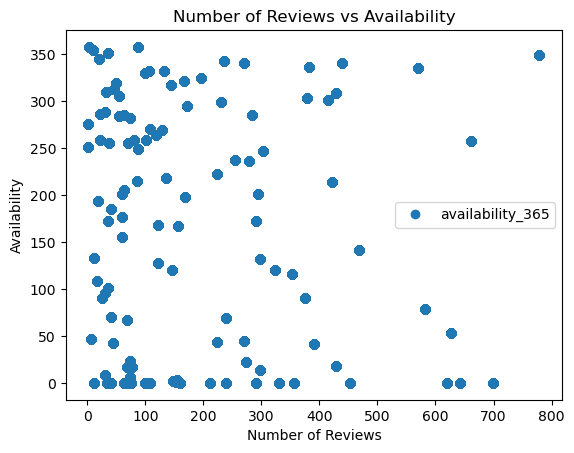

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
plt_rev_avab_ST = short_term.plot(x = 'number_of_reviews', y='availability_365',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Reviews vs Availability')  
plt.xlabel('Number of Reviews')  
plt.ylabel('Availability')  
plt.show()

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = short_term['number_of_reviews'].values.reshape(-1,1)
y = short_term['availability_365'].values.reshape(-1,1)

In [35]:
# Split data into a training set and a test set.
X_train_rev_avab_ST, X_test_rev_avab_ST, y_train_rev_avab_ST, y_test_rev_avab_ST = train_test_split(X, y, test_size=0.3, random_state=0)

## 4.2. Performing regression analysis

In [36]:
# Create a regression object.
regression_train_rev_avab_ST = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [37]:
# Fit the regression object onto the training set.
regression_train_rev_avab_ST.fit(X_train_rev_avab_ST, y_train_rev_avab_ST)

LinearRegression()

In [38]:
# Predict the values of y using X.
y_predicted_rev_avab_ST = regression_train_rev_avab_ST.predict(X_test_rev_avab_ST)

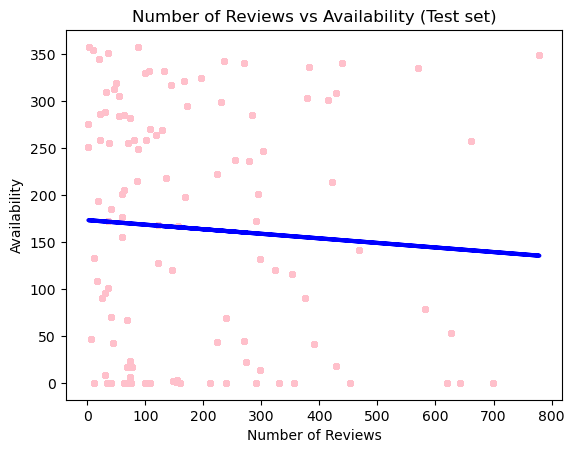

In [39]:
# Create a plot that shows the regression line from the model on the test set.
plot_test_rev_avab_ST = plt
plot_test_rev_avab_ST.scatter(X_test_rev_avab_ST, y_test_rev_avab_ST, color='pink', s = 15)
plot_test_rev_avab_ST.plot(X_test_rev_avab_ST, y_predicted_rev_avab_ST, color='blue', linewidth =3)
plot_test_rev_avab_ST.title('Number of Reviews vs Availability (Test set)')
plot_test_rev_avab_ST.xlabel('Number of Reviews')
plot_test_rev_avab_ST.ylabel('Availability')
plot_test_rev_avab_ST.show()

In [40]:
# Create objects that contain the model summary statistics.
rmse_train_rev_avab_ST = mean_squared_error(y_test_rev_avab_ST, y_predicted_rev_avab_ST) # This is the mean squared error
r2_train_rev_avab_ST = r2_score(y_test_rev_avab_ST, y_predicted_rev_avab_ST) # This is the R2 score. 

In [41]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_minnights_price_train_ST.coef_)
print('Mean squared error: ', rmse_minnights_price_train_ST)
print('R2 score: ', r2_minnights_price_train_ST)

Slope: [[-0.78261127]]
Mean squared error:  4811.708487144978
R2 score:  0.004882798616184569


- SLOPE: A negative slope value indicates a negative relationship (as number of reviews rises, y availability drops)
- MSE: A higher MSE indicates lower model performance, so 4577 is relatively high. It suggests that, on average, the squared difference between the predicted and actual values is significant.
- R2: In this case, the R2 score is quite low (0.0042), indicating that the model explains very little of the variability in the data, which indicates poor fit.

We have the a bad performance of the model short listing. It is not a good model so we will not follow with the analysis. It was not a surprise, as we see the first scatterplot (plt_rev_avab_ST), where the points already indicates there were no relation between variables.
In other words, this linear regression cannot explain the variance in the data, making it a poor choice for a prediction model.

# 5. Regression analysis: accommodates vs price in Short Term

#### HYPOTHESIS 7. If a listing has a high number of accommodates, the price will be higher than for couple or solo guests.

## 5.1. Data prep for regression analysis

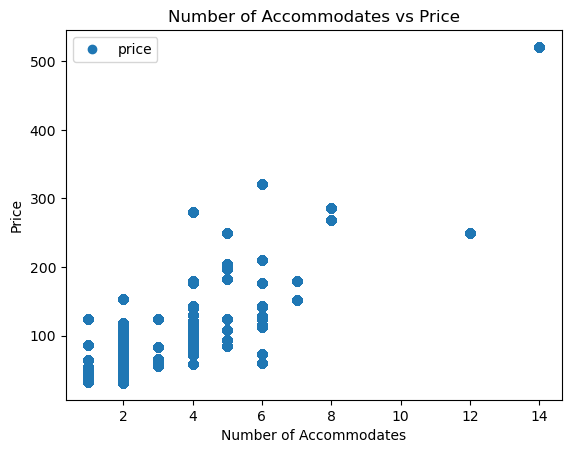

In [42]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
plt_acc_price_ST = short_term.plot(x = 'accommodates', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Accommodates vs Price')  
plt.xlabel('Number of Accommodates')  
plt.ylabel('Price')  
plt.show()

In [43]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = short_term['accommodates'].values.reshape(-1,1)
y = short_term['price'].values.reshape(-1,1)

In [44]:
# Split data into a training set and a test set.
X_train_acc_price_ST, X_test_acc_price_ST, y_train_acc_price_ST, y_test_acc_price_ST = train_test_split(X, y, test_size=0.3, random_state=0)

## 5.2. Performing regression analysis

In [45]:
# Create a regression object.
regression_train_acc_price_ST = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [46]:
# Fit the regression object onto the training set.
regression_train_acc_price_ST.fit(X_train_acc_price_ST, y_train_acc_price_ST)

LinearRegression()

In [47]:
# Predict the values of y using X.
y_predicted_acc_price_ST = regression_train_acc_price_ST.predict(X_test_acc_price_ST)

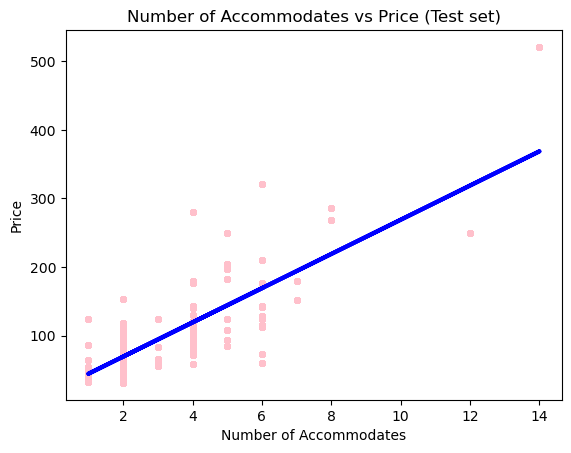

In [48]:
# Create a plot that shows the regression line from the model on the test set.
plot_test_acc_price_ST = plt
plot_test_acc_price_ST.scatter(X_test_acc_price_ST, y_test_acc_price_ST, color='pink', s = 15)
plot_test_acc_price_ST.plot(X_test_acc_price_ST, y_predicted_acc_price_ST, color='blue', linewidth =3)
plot_test_acc_price_ST.title('Number of Accommodates vs Price (Test set)')
plot_test_acc_price_ST.xlabel('Number of Accommodates')
plot_test_acc_price_ST.ylabel('Price')
plot_test_acc_price_ST.show()

In [49]:
# Create objects that contain the model summary statistics.
rmse_train_acc_price_ST = mean_squared_error(y_test_acc_price_ST, y_predicted_acc_price_ST) # This is the mean squared error
r2_train_acc_price_ST = r2_score(y_test_acc_price_ST, y_predicted_acc_price_ST) # This is the R2 score. 

In [50]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_train_acc_price_ST.coef_)
print('Mean squared error: ', rmse_train_acc_price_ST)
print('R2 score: ', r2_train_acc_price_ST)

Slope: [[24.94735801]]
Mean squared error:  2007.8272529107678
R2 score:  0.5847580039155194


- SLOPE: A positive slope indicates a positive relationship (as number of accommodates rises, y price also rises)
- MSE: A lower MSE indicates good model performance, so 1963 is relatively low. It suggests that, on average, the squared difference between the predicted and actual values is not significant. The points are close to the line, in other words.
- R2: In this case, the R2 score is quite high (57%), indicating that the model explains very well of the variability in the data, which indicates good fit. 

We have the a good performance of the model short listing. So we will continue with the test.

### Compare how the regression fits the training set

In [51]:
# Predict.
y_predicted_train_acc_price_ST = regression_train_acc_price_ST.predict(X_train_acc_price_ST) # This is predicting X_train!

In [52]:
rmse_test_acc_price_ST = mean_squared_error(y_train_acc_price_ST, y_predicted_train_acc_price_ST)
r2_test_acc_price_ST = r2_score(y_train_acc_price_ST, y_predicted_train_acc_price_ST)

In [53]:
print('Slope:' ,regression_train_acc_price_ST.coef_)
print('Mean squared error: ', rmse_test_acc_price_ST)
print('R2 score: ', r2_test_acc_price_ST)

Slope: [[24.94735801]]
Mean squared error:  1965.678725865586
R2 score:  0.5695642485338315


We have the a good performance of the model short listing also for the test segment. 
Now that we’ve confirmed the accuracy of the model, we can also confirm the hypothesis, “If a listing has a high number of accommodates, the price will be higher”.

In other words, this linear regression explains the variance in the data, making it a good choice for a prediction model.

# 6. Performance improvement after removing outliers

In [54]:
# Clean the extreme values from the "Price" variable observed during the consistency checks.
df_test = short_term[short_term['price'] <=400] 

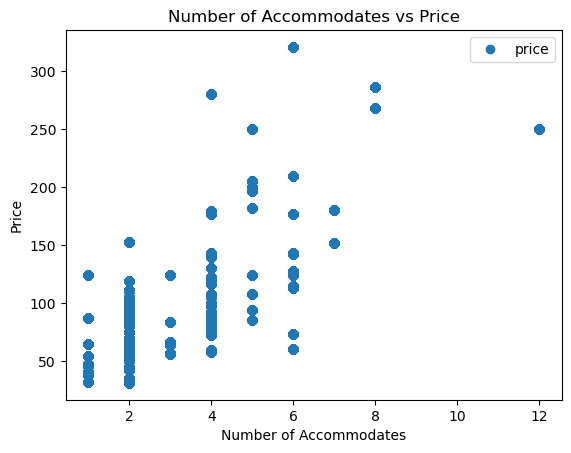

In [55]:
# See how the scatterplot looks without outliers.
df_test.plot(x = 'accommodates', y='price', style='o')  
plt.title('Number of Accommodates vs Price')  
plt.xlabel('Number of Accommodates')  
plt.ylabel('Price')  
plt.show()

In [56]:
# Reshape again.
X2 = df_test['accommodates'].values.reshape(-1,1)
y2 = df_test['price'].values.reshape(-1,1)

In [57]:
# Split data into a training set and a test set.
X2_train_acc_price_ST, X2_test_acc_price_ST, y2_train_acc_price_ST, y2_test_acc_price_ST = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [58]:
# Run and fit the regression.
regression2_train_acc_price_ST = LinearRegression()  
regression2_train_acc_price_ST.fit(X2_train_acc_price_ST, y2_train_acc_price_ST)

LinearRegression()

In [59]:
# Predict the values of y using X.
y2_predicted_acc_price_ST = regression2_train_acc_price_ST.predict(X2_test_acc_price_ST)

In [60]:
# Create objects that contain the model summary statistics.
rmse2_test_acc_price_ST = mean_squared_error(y2_test_acc_price_ST, y2_predicted_acc_price_ST) # This is the mean squared error
r2_2_test_acc_price_ST = r2_score(y2_test_acc_price_ST, y2_predicted_acc_price_ST) # This is the R2 score. 

In [61]:
print('Slope:' ,regression2_train_acc_price_ST.coef_)
print('Mean squared error: ', rmse2_test_acc_price_ST)
print('R2 score: ', r2_2_test_acc_price_ST)

Slope: [[21.0174149]]
Mean squared error:  1757.6713954934364
R2 score:  0.461793606675556


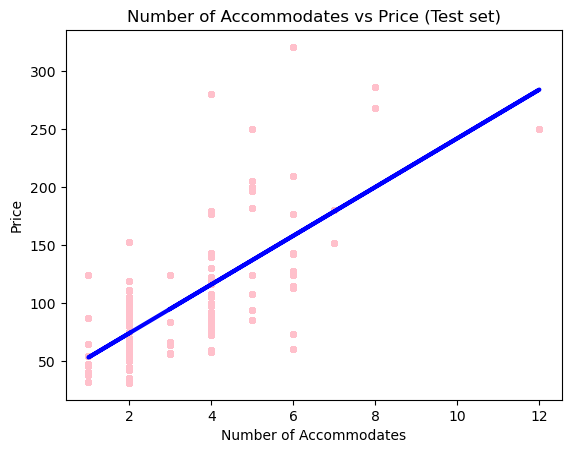

In [62]:
# Create a plot that shows the regression line from the model on the test set.
plot_test_acc_price_ST = plt
plot_test_acc_price_ST.scatter(X2_test_acc_price_ST, y2_test_acc_price_ST, color='pink', s = 15)
plot_test_acc_price_ST.plot(X2_test_acc_price_ST, y2_predicted_acc_price_ST, color='blue', linewidth =3)
plot_test_acc_price_ST.title('Number of Accommodates vs Price (Test set)')
plot_test_acc_price_ST.xlabel('Number of Accommodates')
plot_test_acc_price_ST.ylabel('Price')
plot_test_acc_price_ST.show()

The model performes worse after dropping the outliers in the price:
BEFORE: 57%
AFTER: R2 score = 45%